# Lab Customer Analysis Round 6

In [1]:
import pandas as pd  
import numpy as np

GET AND DEALING WITH THE DATA

In [2]:
# First I prepare the database with the previously performed transformations in lab 2 and lab 3
marketing = pd.read_csv('marketing_customer_analysis.csv')
print(type(marketing))
display(marketing.head())
display(marketing.tail(7))
print(marketing.shape)

<class 'pandas.core.frame.DataFrame'>


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9127,TF56202,California,5032.165498,No,Basic,College,2/12/11,Employed,M,66367,...,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


(9134, 24)


In [3]:
cols = []
for column in marketing.columns:
    cols.append(column.lower().replace(' ', '_'))
marketing.columns = cols
display(marketing.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
marketing['number_of_open_complaints'] = marketing['number_of_open_complaints'].fillna('0')
len(marketing[marketing['number_of_open_complaints'].isna()==True])

0

In [5]:
marketing['months'] = marketing['effective_to_date']
marketing['months'] = pd.to_datetime(marketing['effective_to_date'], errors='coerce')
display(marketing.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03


EXPLORE THE DATA

In [6]:
# Check the data types of the columns. 
marketing.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                        object
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [7]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [8]:
# Get the numerical and categorical data 
numerical = marketing.select_dtypes(np.number)
display(numerical)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
categorical = marketing.select_dtypes(include=['object'])
display(categorical)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


PROCESSING DATA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

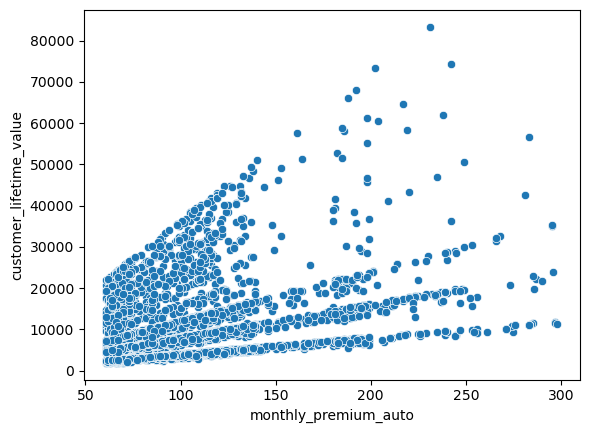

In [11]:
# 1. X-y split.
sns.scatterplot(x='monthly_premium_auto',y='customer_lifetime_value',data=marketing)
plt.show()

In [12]:
y = marketing['customer_lifetime_value']
X = marketing[['monthly_premium_auto']]

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
lm = LinearRegression()
lm.fit(X,y) 
print(lm.intercept_)
print(lm.coef_)

628.500437800235
[79.12997399]


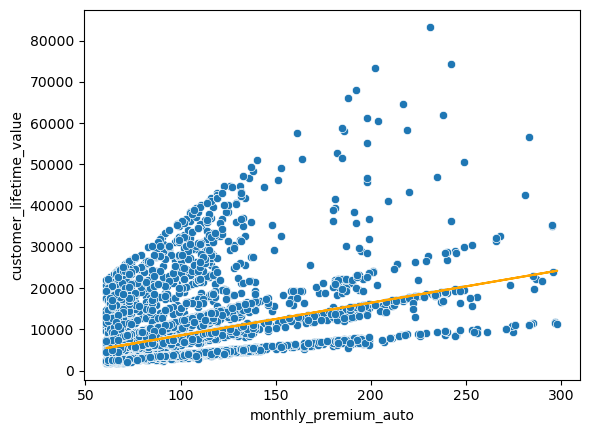

In [15]:
regression_line = lm.intercept_ + lm.coef_[0]*marketing['monthly_premium_auto'] 
plt.plot(marketing['monthly_premium_auto'], regression_line, c = 'orange')
sns.scatterplot(x='monthly_premium_auto',y='customer_lifetime_value',data=marketing)
plt.show()

In [16]:
marketing2 = marketing[['customer_lifetime_value']].copy()
marketing2.columns = ["y_real"]
marketing2['y_pred'] = lm.predict(X)
marketing2['error'] = marketing2['y_real'] - marketing2['y_pred']
marketing2

,y_real,y_pred,error
0,2763.519279,6088.468643,-3324.949364
1,6979.535903,8066.717992,-1087.182089
2,12887.431650,9174.537628,3712.894022
3,7645.861827,9016.277680,-1370.415853
4,2813.692575,6404.988539,-3591.295964
...,...,...,...
9129,23405.987980,6404.988539,17000.999441
9130,3096.511217,6879.768383,-3783.257166
9131,8163.890428,7354.548227,809.342201
9132,7524.442436,8224.977940,-700.535504


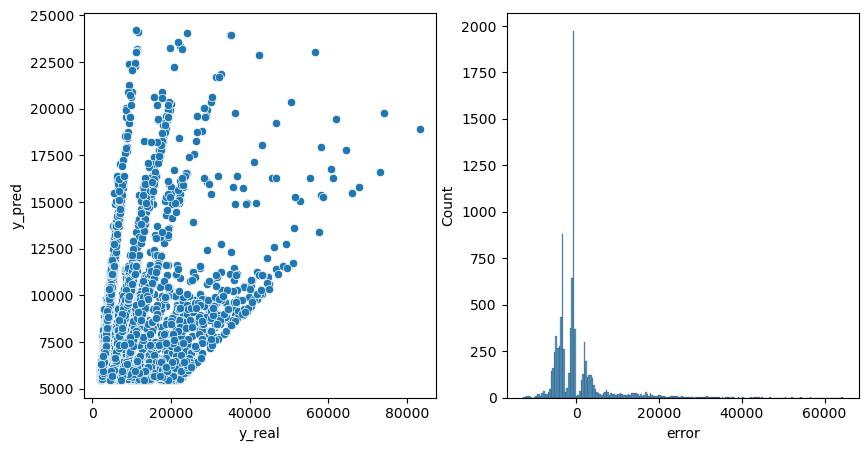

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data = marketing2, y = "y_pred", x = "y_real", ax = ax[0])
sns.histplot(marketing2["error"], ax = ax[1])
plt.show()

In [18]:
count_zeros = marketing["income"].value_counts()[0]
print(count_zeros)

2317


I made the model using the "income" variable initially, but the model is as bad as that of the 'total_claim_amount' variable. The variable income has 2317 rows with 0, which represents 25% of the rows, so at this moment it is not considered feasible to eliminate the rows, so for this first model I leave the 'total_claim_amount' variable.

In [19]:
# 2. Normalize (numerical).

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = marketing['customer_lifetime_value']
X = marketing.drop(['customer_lifetime_value'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [21]:
X_num

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.234764
9130,21604,79,14,28,0,1,379.200000
9131,0,85,9,37,3,2,790.784983
9132,21941,96,34,3,0,3,691.200000


In [22]:
X_num.describe()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [23]:
transformer = MinMaxScaler()
transformer.fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [24]:
pd.DataFrame(x_normalized, columns=X_num.columns).corr()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [25]:
transformer = StandardScaler()
transformer.fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized = pd.DataFrame(x_standardized,columns=X_num.columns)
x_standardized.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


In [26]:
x_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
income,9134.0,5.160945e-16,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
monthly_premium_auto,9134.0,-1.480399e-16,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
months_since_last_claim,9134.0,4.976191e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
months_since_policy_inception,9134.0,1.003260e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
number_of_open_complaints,9134.0,-1.232865e-16,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
number_of_policies,9134.0,3.747702e-16,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
total_claim_amount,9134.0,7.961420e-19,1.000055,-1.494022,-0.557106,-0.172620,0.390472,8.465696


In [27]:
pd.concat([X_num,x_normalized,x_standardized],axis=1)

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,income,monthly_premium_auto,months_since_last_claim,...,number_of_open_complaints,number_of_policies,total_claim_amount,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147,0.562847,0.033755,0.914286,...,0.0,0.000,0.132974,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,0,94,13,42,0,8,1131.464935,0.000000,0.139241,0.371429,...,0.0,0.875,0.391051,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,48767,108,18,38,0,2,566.472247,0.487763,0.198312,0.514286,...,0.0,0.125,0.195764,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,0,106,18,65,0,7,529.881344,0.000000,0.189873,0.514286,...,0.0,0.750,0.183117,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,43836,73,12,44,0,1,138.130879,0.438443,0.050633,0.342857,...,0.0,0.000,0.047710,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.234764,0.719547,0.050633,0.514286,...,0.0,0.125,0.068485,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,21604,79,14,28,0,1,379.200000,0.216081,0.075949,0.400000,...,0.0,0.000,0.131034,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0,85,9,37,3,2,790.784983,0.000000,0.101266,0.257143,...,0.6,0.125,0.273297,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,21941,96,34,3,0,3,691.200000,0.219452,0.147679,0.971429,...,0.0,0.250,0.238876,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


In [28]:
# 3. One Hot/Label Encoding (categorical).
X_cat = X.select_dtypes(include = object)

In [29]:
# I have the doubt, If I must drop the 'customer' variable because is the id.
# X_cat = marketing.drop(['customer'], axis=1)

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_cat) 
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
onehot_encoded.head(20)

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
       'ZZ97035'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
       '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
       '1/20/11', '1/21/11', '1/22/11', '1/23/11', '1/24/11', '1/25/11',
       '1/26/11', '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11',
       '1/31/11', '1/4/11', '1/5/11', '1/6/11', '1/7/11', '1/8/11',
       '1/9/11', '2/1/11', '2/10/11', '2/11/11', '2/12/11', '2/13/11',
       '2/14/11', '2/15/11', '2/16/11', '2/17/11', '2/18/11', '2/19/11',
       '2/2/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11', '2/24/11',
       '2/25/11', '2/26/11', '2/27/11', '2/28/11',

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# 4. Concat DataFrames.
X = pd.concat([x_normalized, onehot_encoded], axis=1)

In [32]:
X.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_AA10041,customer_AA11235,customer_AA16582,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


LINEAR REGRESSION

In [33]:
# 5. Train-test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 9257)
(1827, 9257)
(7307,)
(1827,)


In [35]:
X_train.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_AA10041,customer_AA11235,customer_AA16582,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
5123,0.511537,0.000000,0.800000,0.323232,0.2,1.0,0.077150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7738,0.000000,0.075949,0.857143,0.252525,0.0,0.0,0.196569,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,0.811124,0.054852,0.200000,0.676768,0.0,0.0,0.122739,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8580,0.722777,0.012658,0.057143,0.666667,0.0,1.0,0.094206,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7857,0.547474,0.021097,0.085714,0.868687,0.0,0.0,0.135448,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
y_train.head()

5123    4768.955924
7738    2827.559570
214     2912.892035
8580    5138.244998
7857    2610.369217
Name: customer_lifetime_value, dtype: float64

In [37]:
# 6. Apply linear regression.
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

1.0

MODEL VALIDATION

In [39]:
# 7. Description: R2
from sklearn.metrics import mean_absolute_error, r2_score

In [40]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.15075908185170317

In [41]:
y_pred_test

array([ 9331.71953734,  5274.06401027,  7380.01788047, ...,
       10345.72678346,  5304.36252494,  8355.20756466])

In [42]:
# 8. Description: MSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred_test))

6615.633265140302

In [43]:
# 9. Description: RMSE
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

6615.633265140302

In [44]:
# 10. Description: MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

3997.9167746327807
